In [1]:
import src as typy
from joblib import Parallel, delayed
from multiprocessing import cpu_count
import os
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy.ndimage import gaussian_filter1d
import pandas as pd

In [2]:
plt.style.use('seaborn-v0_8-bright')
from cycler import cycler
color=['blue','green','red','orange','cyan','darkviolet','brown','deeppink','lime']
default_cycler = (cycler(color=color))
plt.rc('axes', prop_cycle=default_cycler)

In [15]:
outdir= "./Results"
sigmas = [0.0057,0.009,0.014,0.02]
# sigmas = [0.0057]

In [16]:
data_array = [typy.reads.read_epc(path=f"{outdir}/{i}") for i in sigmas]

In [17]:
models = []
for data in data_array:
    meta,e_k,e_kq,ph,g_kq = data
    model = typy.epc.model(e_k,e_kq,ph=np.zeros(shape=(meta.nph,meta.nq)),g=g_kq)
    models.append(model)

In [18]:
suscep_array = []
for model in models:
    suscep  = model.calculate('susceptibility')
    suscep_array.append(suscep)

In [28]:
temp_array = []
temps = [1,10,100,200,500,1000]
meta,e_k,e_kq,ph,g_kq = data_array[0]
for temp in temps:
    model = typy.epc.model(e_k,e_kq,ph=np.zeros(shape=(meta.nph,meta.nq)),g=g_kq,T=temp)
    suscep  = model.calculate('susceptibility')
    temp_array.append(suscep)

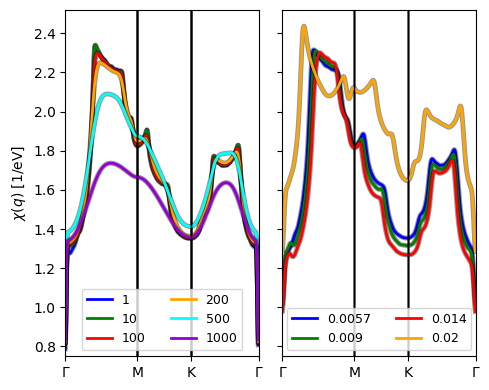

In [78]:
fig, axs = plt.subplots(1,2,figsize=(5,4),sharex="col", sharey=True)
for j,model in enumerate(temps):
    axs[0].plot(-gaussian_filter1d(np.array(temp_array[j]).real.astype(float),2),lw=3.5,c='black',alpha=0.4)
    axs[0].plot(-gaussian_filter1d(np.array(temp_array[j]).real.astype(float),2),lw=2,label=temps[j])
    axs[0].set_xlim(0,meta.nq)
    # axs[0].set_title(rf"fd(T)={temps[k]} $\sigma$={ordered_sigma[j]} ")
    if j==0:
        axs[0].set_ylabel(r"$\chi(q)$ [1/eV]")
    # else:
        # axs[j].set_yticks([])
    axs[0].set_xticks(meta.sym,["Γ","M","K","Γ"])
    for i in meta.sym[1:-1]:
        axs[0].axvline(i,c='black'  ,lw=1)
    # axs[j].set_ylim(0,160)
    axs[0].set_xlim(0,meta.nq)
    axs[0].legend(loc=8,ncol=2,fontsize=9)


for k,j in enumerate(sigmas):
    axs[1].plot(-gaussian_filter1d(np.array(suscep_array[k]).real.astype(float),4),lw=3.5,c='black',alpha=0.4)
    axs[1].plot(-gaussian_filter1d(np.array(suscep_array[k]).real.astype(float),4),lw=2,label=sigmas[k])
    axs[1].set_xlim(0,meta.nq)
    # axs[1].set_title(rf"fd(T)={temps[k]} $\sigma$={ordered_sigma[j]} ")
    if j==0:
        axs[1].set_ylabel(r"$1/meV$")
    # else:
        # axs[j].set_yticks([])
    axs[1].set_xticks(meta.sym,["Γ","M","K","Γ"])
    for i in meta.sym[1:-1]:
        axs[1].axvline(i,c='black'  ,lw=1)
    # axs[j].set_ylim(0,160)
    axs[1].set_xlim(0,meta.nq)
    axs[1].legend(loc=8,ncol=2,fontsize=9)

plt.ylim(0.75,)
plt.tight_layout()
plt.savefig("./Plots/suscep_temp.pdf")
plt.show()